In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
import plotly.offline as py

import folium 
from folium import plugins

from datetime import date, timedelta

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [13]:
from google.colab import files
uploaded = files.upload() #11개 데이터파일 업로드

Saving Case.csv to Case.csv
Saving PatientInfo.csv to PatientInfo (1).csv
Saving Policy.csv to Policy.csv
Saving Region.csv to Region.csv
Saving SearchTrend.csv to SearchTrend.csv
Saving SeoulFloating.csv to SeoulFloating (1).csv
Saving Time.csv to Time (1).csv
Saving TimeAge.csv to TimeAge.csv
Saving TimeGender.csv to TimeGender.csv
Saving TimeProvince.csv to TimeProvince.csv
Saving Weather.csv to Weather.csv


In [4]:
patient_info = pd.read_csv("PatientInfo.csv")
floating = pd.read_csv("SeoulFloating.csv")
time = pd.read_csv("Time.csv") 

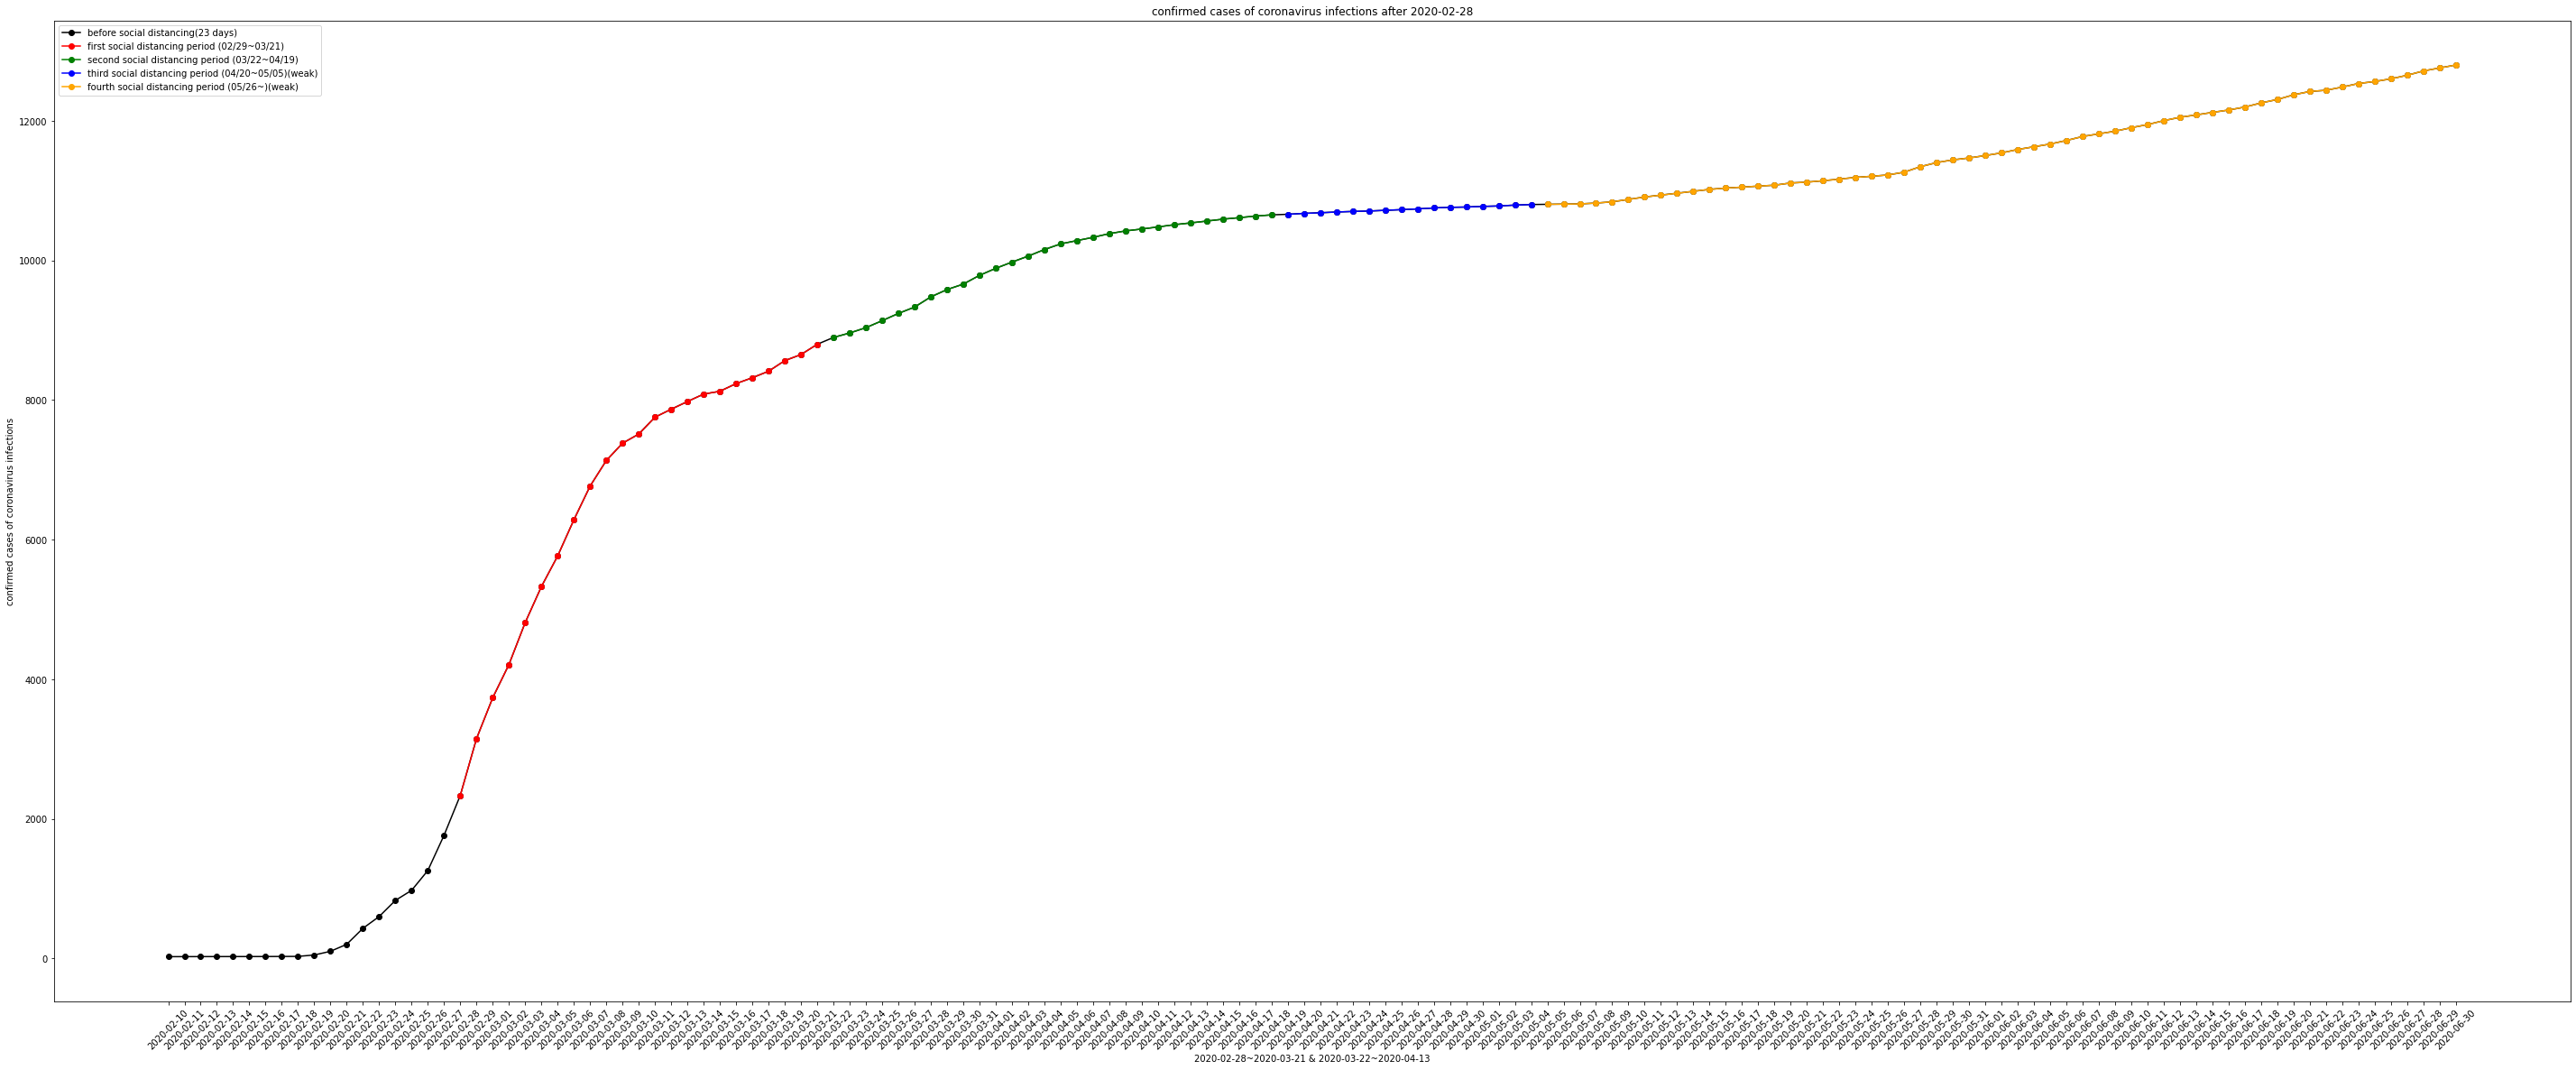

In [6]:
#사회적 거리두기 시행 이전 23일과 시행 이후 23일의 일별 확진자수를 시각화합니다.
date = time['date'] #날짜 column
conNum = time['confirmed'] #확진자수 column
plt.figure()
plt.rcParams['figure.figsize'] = [50, 20] # [width, height]

#사회적 거리두기 이전 23일 동안의 확진자수 그래프 그리기
xbefore=date[21:]  
ybefore=conNum[21:]
plt.plot(xbefore, ybefore, marker='o', color='black', label='before social distancing(23 days)')



xafter=date[39:62]  #첫 사회적 거리두기기간 (02/29~03/21)
yafter=conNum[39:62]
plt.plot(xafter, yafter, marker='o', color='red', label='first social distancing period (02/29~03/21)')

xafter=date[62:90]
yafter=conNum[62:90]
plt.plot(xafter, yafter, marker='o', color='green', label='second social distancing period (03/22~04/19)')

xafter=date[90:106]
yafter=conNum[90:106] 
plt.plot(xafter, yafter, marker='o', color='blue', label='third social distancing period (04/20~05/05)(weak)')

xafter=date[106:len(date)]
yafter=conNum[106:len(conNum)]
plt.plot(xafter, yafter, marker='o', color='orange', label='fourth social distancing period (05/26~)(weak)')


plt.xticks(rotation=45) #x축 글자 기울이기
plt.xlabel("2020-02-28~2020-03-21 & 2020-03-22~2020-04-13")
plt.ylabel("confirmed cases of coronavirus infections")
plt.title("confirmed cases of coronavirus infections after 2020-02-28")
plt.legend()
plt.show()

In [7]:
#유동인구 연령대별로 분류
floating_20= floating.query('birth_year==20')
floating_30= floating.query('birth_year==30')
floating_40= floating.query('birth_year==40')
floating_50= floating.query('birth_year==50')
floating_60= floating.query('birth_year==60')
floating_70= floating.query('birth_year==70')

#dataFrame에서 date, fp_num 행 외에는 필요가 없으므로 이들만 남겨둠. 
floating_20 = floating_20.loc[:,['date', 'fp_num']]
floating_30 = floating_30.loc[:,['date', 'fp_num']]
floating_40 = floating_40.loc[:,['date', 'fp_num']]
floating_50 = floating_50.loc[:,['date', 'fp_num']]
floating_60 = floating_60.loc[:,['date', 'fp_num']]
floating_70 = floating_70.loc[:,['date', 'fp_num']]

#각 날짜에 해당하는 인원 수 합치기
floating_20 = floating_20.groupby(['date'])[['fp_num']].sum()
floating_30 = floating_30.groupby(['date'])[['fp_num']].sum()
floating_40 = floating_40.groupby(['date'])[['fp_num']].sum()
floating_50 = floating_50.groupby(['date'])[['fp_num']].sum()
floating_60 = floating_60.groupby(['date'])[['fp_num']].sum()
floating_70 = floating_70.groupby(['date'])[['fp_num']].sum()

#날짜를 1월 22일부터로 설정. (코로나 확진 환자 처음 생긴 날)
floating_20_date_modify = floating_20[21:]
floating_30_date_modify = floating_30[21:]
floating_40_date_modify = floating_40[21:]
floating_50_date_modify = floating_50[21:]
floating_60_date_modify = floating_60[21:]
floating_70_date_modify = floating_70[21:]

#index 초기화해주기
floating_20_date_modify1 = floating_20_date_modify.reset_index()
floating_30_date_modify1 = floating_30_date_modify.reset_index()
floating_40_date_modify1 = floating_40_date_modify.reset_index()
floating_50_date_modify1 = floating_50_date_modify.reset_index()
floating_60_date_modify1 = floating_60_date_modify.reset_index()
floating_70_date_modify1 = floating_70_date_modify.reset_index()

In [8]:
floating_20_date_modify1.at[31, 'fp_num']
floating_20_date_modify1.at[32, 'fp_num']
floating_20_date_modify1.at[31, 'fp_num']

35458810

In [9]:
floating_20_date_modify1.at[32, 'fp_num'] = floating_20_date_modify1.at[32, 'fp_num']*(1/1.92)
floating_30_date_modify1.at[32, 'fp_num'] = floating_30_date_modify1.at[32, 'fp_num']*(1/1.92)
floating_40_date_modify1.at[32, 'fp_num'] = floating_40_date_modify1.at[32, 'fp_num']*(1/1.92)
floating_50_date_modify1.at[32, 'fp_num'] = floating_50_date_modify1.at[32, 'fp_num']*(1/1.92)
floating_60_date_modify1.at[32, 'fp_num'] = floating_60_date_modify1.at[32, 'fp_num']*(1/1.92)
floating_70_date_modify1.at[32, 'fp_num'] = floating_70_date_modify1.at[32, 'fp_num']*(1/1.92)

In [ ]:
floating_20_date_modify1

In [10]:
#서울 사람들만 분류
patient = patient_info.query('province == "Seoul"')

#환자 연령대별로 분류
patient_20= patient.query('age=="20s"')
patient_30= patient.query('age=="30s"')
patient_40= patient.query('age=="40s"')
patient_50= patient.query('age=="50s"')
patient_60= patient.query('age=="60s"')
patient_70= patient.query('age=="70s"')

#confirmed_date column만 불러온다
patient_20 = patient_20.loc[:,['confirmed_date']]
patient_30 = patient_30.loc[:,['confirmed_date']]
patient_40 = patient_40.loc[:,['confirmed_date']]
patient_50 = patient_50.loc[:,['confirmed_date']]
patient_60 = patient_60.loc[:,['confirmed_date']]
patient_70 = patient_70.loc[:,['confirmed_date']]

#각 날짜별 사람 수 통합
#인원수 파악을 위해 1이 들어간 column 새로 만들어 준다
patient_20['patient']=np.nan
patient_20.loc[:,['patient']]=1
patient_30['patient']=np.nan
patient_30.loc[:,['patient']]=1
patient_40['patient']=np.nan
patient_40.loc[:,['patient']]=1
patient_50['patient']=np.nan
patient_50.loc[:,['patient']]=1
patient_60['patient']=np.nan
patient_60.loc[:,['patient']]=1
patient_70['patient']=np.nan
patient_70.loc[:,['patient']]=1

#각 날짜별 확진자 수 
patient_20 = patient_20.groupby(['confirmed_date'])[['patient']].sum()
patient_20.columns.name = 'date'
patient_30 = patient_30.groupby(['confirmed_date'])[['patient']].sum()
patient_30.columns.name = 'date'
patient_40 = patient_40.groupby(['confirmed_date'])[['patient']].sum()
patient_40.columns.name = 'date'
patient_50 = patient_50.groupby(['confirmed_date'])[['patient']].sum()
patient_50.columns.name = 'date'
patient_60 = patient_60.groupby(['confirmed_date'])[['patient']].sum()
patient_60.columns.name = 'date'
patient_70 = patient_70.groupby(['confirmed_date'])[['patient']].sum()
patient_70.columns.name = 'date'

#index 초기화
patient_20=patient_20.reset_index()
patient_30=patient_30.reset_index()
patient_40=patient_40.reset_index()
patient_50=patient_50.reset_index()
patient_60=patient_60.reset_index()
patient_70=patient_70.reset_index()

#이후에 merge 할 수 있게 patient data의 column 이름을 floating data의 column과 똑같이 맞춰준다
#또한, 아직 floating data가 2/29일까지 없으므로 floating data는 2/29일까지, 확진자 데이터는 2/29일에서 14일 후인 3/14일까지 나타냈음.
#각 patient data를 3/14일까지의 데이터로만 추리는 작업은 각 set을 보고 몇 번째 col이 3/14인지 체크하는 수작업을 했음. 
patient_20.rename(columns={"confirmed_date":"date"}, inplace = True)
patient_20_2=patient_20[8:111]
patient_30.rename(columns={"confirmed_date":"date"}, inplace = True)
patient_30_2=patient_30[:]
patient_40.rename(columns={"confirmed_date":"date"}, inplace = True)
patient_40_2=patient_40[:]
patient_50.rename(columns={"confirmed_date":"date"}, inplace = True)
patient_50_2=patient_50[:]
patient_60.rename(columns={"confirmed_date":"date"}, inplace = True)
patient_60_2=patient_60[:]
patient_70.rename(columns={"confirmed_date":"date"}, inplace = True)
patient_70_2=patient_70[:]

#각 날짜에 대한 유동인구, 확진자 수 한 dataFrame에 묶기
#Nan data에는 0을 넣어줌. 
combine_20_2= pd.merge(floating_20_date_modify1,patient_20_2,how='outer',on='date')
combine_20_2 = combine_20_2.fillna(0)
combine_30_2= pd.merge(floating_30_date_modify1,patient_30_2,how='outer',on='date')
combine_30_2 = combine_30_2.fillna(0)
combine_40_2= pd.merge(floating_40_date_modify1,patient_40_2,how='outer',on='date')
combine_40_2 = combine_40_2.fillna(0)
combine_50_2= pd.merge(floating_50_date_modify1,patient_50_2,how='outer',on='date')
combine_50_2 = combine_50_2.fillna(0)
combine_60_2= pd.merge(floating_60_date_modify1,patient_60_2,how='outer',on='date')
combine_60_2 = combine_60_2.fillna(0)
combine_70_2= pd.merge(floating_70_date_modify1,patient_70_2,how='outer',on='date')
combine_70_2 = combine_70_2.fillna(0)

In [14]:
floating_20_date_modify1

,date,fp_num
0,2020-01-22,36066830
1,2020-01-23,34611120
2,2020-01-24,29333360
3,2020-01-25,26769130
4,2020-01-26,29136330
...,...,...
125,2020-05-27,36798640
126,2020-05-28,36811520
127,2020-05-29,26027020
128,2020-05-30,35840240


In [ ]:
patient_20

In [ ]:
patient_20_2

In [ ]:
combine_20_2

In [ ]:
# create some data
x= combine_20_2['date']                 # values of x
y1= combine_20_2['patient']     # values of y1(x)
y2= combine_20_2['fp_num']  # svalues of y2(x)

fig = plt.figure()
ax1 = fig.add_subplot(111)

# create line plot of y1(x)
line1, = ax1.plot(x, y1, 'g', label="Function y1")
ax1.set_xlabel('x')
ax1.set_ylabel('y1', color='g')

# create shared axis for y2(x)
ax2 = ax1.twinx()

# create line plot of y2(x)
line2, = ax2.plot(x, y2, 'r', label="Function y2")
# ax1.set_xlabel('x')
ax2.set_ylabel('y2', color='r')

# set title, plot limits, etc
plt.title('Two functions on common x axis')
# plt.xlim(-2, 18)
# plt.ylim(0, 25)

# add a legend, and position it on the upper right
plt.legend((line1, line2), ('Function y1', 'Function y2'))

plt.show()

In [ ]:
#그래프 그리기

#20대
x= combine_20_2['date']
y1= combine_20_2['patient']
y2= combine_20_2['fp_num']
plt.figure(figsize=(45,12))
plt.bar(x,y2,color='lightcoral')
plt.ylim(25000000,40000000)
plt.title("20's floating population")
plt.xticks(rotation=90)
plt.ylabel("20's floating population")
plt.show()

plt.figure(figsize=(45,12))
plt.plot(x,y1,color='lightcoral')
plt.title("20's comfirmed patient number on Seoul")
plt.xticks(rotation=90)
plt.ylabel("20's confirmed patient")
plt.show()



#30대
x= combine_30_2['date']
y1= combine_30_2['patient']
y2= combine_30_2['fp_num']
plt.figure(figsize=(45,12))
plt.bar(x,y2,color='orange')
plt.ylim(25000000,45000000)
plt.title("30's floating population")
plt.xticks(rotation=90)
plt.ylabel("30's floating population")
plt.show()

plt.figure(figsize=(45,12))
plt.plot(x,y1,color='orange')
plt.title("30's comfirmed patient number on Seoul")
plt.xticks(rotation=90)
plt.ylabel("30's confirmed patient")
plt.show()

#40대 
x= combine_40_2['date']
y1= combine_40_2['patient']
y2= combine_40_2['fp_num']
plt.figure(figsize=(45,12))
plt.bar(x,y2,color='gold')
plt.ylim(25000000,45000000)
plt.title("40's floating population")
plt.xticks(rotation=90)
plt.ylabel("40's floating population")
plt.show()

plt.figure(figsize=(45,12))
plt.plot(x,y1,color='gold')
plt.title("40's comfirmed patient number on Seoul")
plt.xticks(rotation=90)
plt.ylabel("40's confirmed patient")
plt.show()

#50대
x= combine_50_2['date']
y1= combine_50_2['patient']
y2= combine_50_2['fp_num']
plt.figure(figsize=(45,12))
plt.bar(x,y2,color='yellowgreen')
plt.ylim(25000000,40000000)
plt.title("50's floating population")
plt.xticks(rotation=90)
plt.ylabel("50's floating population")
plt.show()

plt.figure(figsize=(45,12))
plt.plot(x,y1,color='yellowgreen')
plt.title("50's comfirmed patient number on Seoul")
plt.xticks(rotation=90)
plt.ylabel("50's confirmed patient")
plt.show()

#60대
x= combine_60_2['date']
y1= combine_60_2['patient']
y2= combine_60_2['fp_num']
plt.figure(figsize=(45,12))
plt.bar(x,y2,color='mediumturquoise')
plt.ylim(15000000,30000000)
plt.title("60's floating population")
plt.xticks(rotation=90)
plt.ylabel("60's floating population")
plt.show()

plt.figure(figsize=(45,12))
plt.plot(x,y1,color='mediumturquoise')
plt.title("60's comfirmed patient number on Seoul")
plt.xticks(rotation=45)
plt.ylabel("60's confirmed patient")
plt.show()

#70대
x= combine_70_2['date']
y1= combine_70_2['patient']
y2= combine_70_2['fp_num']
plt.figure(figsize=(45,12))
plt.bar(x,y2,color='plum')
plt.ylim(10000000,22000000)
plt.title("70's floating population")
plt.xticks(rotation=90)
plt.ylabel("70's floating population")
plt.show()

plt.figure(figsize=(45,12))
plt.plot(x,y1,color='plum')
plt.title("70's comfirmed patient number on Seoul")
plt.xticks(rotation=90)
plt.ylabel("70's confirmed patient")
plt.show()

#1 출퇴근 시간을 제외한 유동인구 총합 구하기(근로가 힘든 고연령자도 제외)

In [1]:
import pandas as pd


In [2]:
flt_20_01 = pd.read_csv('/content/drive/My Drive/seoul_floating/Floating_Population_2001.csv')
flt_20_02 = pd.read_csv('/content/drive/My Drive/seoul_floating/Floating_Population_2002.csv')
flt_20_03 = pd.read_csv('/content/drive/My Drive/seoul_floating/Floating_Population_2003.csv')
flt_20_04 = pd.read_csv('/content/drive/My Drive/seoul_floating/Floating_Population_2004.csv')
flt_20_05 = pd.read_csv('/content/drive/My Drive/seoul_floating/Floating_Population_2005.csv')
flt_20_06 = pd.read_csv('/content/drive/My Drive/seoul_floating/Floating_Population_2006.csv')
flt_20_07 = pd.read_csv('/content/drive/My Drive/seoul_floating/Floating_Population_2007.csv')

flt_20_01 = flt_20_01.loc[:,['일자','시간(1시간단위)','연령대(10세단위)','유동인구수']]
flt_20_02 = flt_20_02.loc[:,['일자','시간(1시간단위)','연령대(10세단위)','유동인구수']]
flt_20_03 = flt_20_03.loc[:,['일자','시간(1시간단위)','연령대(10세단위)','유동인구수']]
flt_20_04 = flt_20_04.loc[:,['일자','시간(1시간단위)','연령대(10세단위)','유동인구수']]
flt_20_05 = flt_20_05.loc[:,['일자','시간(1시간단위)','연령대(10세단위)','유동인구수']]
flt_20_06 = flt_20_06.loc[:,['일자','시간(1시간단위)','연령대(10세단위)','유동인구수']]
flt_20_07 = flt_20_07.loc[:,['일자','시간(1시간단위)','연령대(10세단위)','유동인구수']]

In [3]:
flt_20_07.tail()

,일자,시간(1시간단위),연령대(10세단위),유동인구수
223195,20200731,22,20,29360
223196,20200731,22,20,32900
223197,20200731,22,30,34010
223198,20200731,23,30,21960
223199,20200731,23,70,17770


In [4]:
flt_combine = pd.concat([flt_20_01, flt_20_02, flt_20_03, flt_20_04, flt_20_05, flt_20_06, flt_20_07],ignore_index=True)
flt_combine.describe

<bound method NDFrame.describe of                일자  시간(1시간단위)  연령대(10세단위)  유동인구수
0        20200101          0          70   7910
1        20200101          1          20  12330
2        20200101          1          40  34400
3        20200101          1          40  24400
4        20200101          1          50  36590
...           ...        ...         ...    ...
1523995  20200731         22          20  29360
1523996  20200731         22          20  32900
1523997  20200731         22          30  34010
1523998  20200731         23          30  21960
1523999  20200731         23          70  17770

[1524000 rows x 4 columns]>

In [5]:
flt_combine.rename(columns={'일자':'date', '시간(1시간단위)':'time','연령대(10세단위)':'age','유동인구수':'fp_num'}, inplace=True)
flt_combine.head()

,date,time,age,fp_num
0,20200101,0,70,7910
1,20200101,1,20,12330
2,20200101,1,40,34400
3,20200101,1,40,24400
4,20200101,1,50,36590


In [67]:
flt_combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1524000 entries, 0 to 1523999
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype
---  ------  --------------    -----
 0   date    1524000 non-null  int64
 1   time    1524000 non-null  int64
 2   age     1524000 non-null  int64
 3   fp_num  1524000 non-null  int64
dtypes: int64(4)
memory usage: 46.5 MB


In [68]:
work_too_old = flt_combine[flt_combine['age'] >= 60] # 60대이상 고령자는 제외, 근로자로 부적합
work_too_old.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508000 entries, 0 to 1523999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   date    508000 non-null  int64
 1   time    508000 non-null  int64
 2   age     508000 non-null  int64
 3   fp_num  508000 non-null  int64
dtypes: int64(4)
memory usage: 19.4 MB


In [19]:
work_too_old.groupby('date').sum()['fp_num']

date
20200101    45871660
20200102    46893390
20200103    46895130
20200104    46378480
20200105    46162420
              ...   
20200727    42329720
20200728    42298830
20200729    42355760
20200730    42136440
20200731    42192290
Name: fp_num, Length: 212, dtype: int64

In [57]:
work_people = flt_combine[flt_combine.age < 60] # 근로자 추출
work_people.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016000 entries, 1 to 1523998
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype
---  ------  --------------    -----
 0   date    1016000 non-null  int64
 1   time    1016000 non-null  int64
 2   age     1016000 non-null  int64
 3   fp_num  1016000 non-null  int64
dtypes: int64(4)
memory usage: 38.8 MB


In [55]:
go_to_work = (work_people.time < 11) & (work_people.time >= 5)  # 출근시간
off_work = (work_people.time < 21) & (work_people.time >= 17) # 퇴근시간


time_to_work = work_people[go_to_work | off_work]
time_to_work.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423200 entries, 17 to 1523990
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   date    423200 non-null  int64
 1   time    423200 non-null  int64
 2   age     423200 non-null  int64
 3   fp_num  423200 non-null  int64
dtypes: int64(4)
memory usage: 16.1 MB


In [56]:
time_sep1 = (work_people.age >= 11) & (work_people.age < 17) # 근무시간
time_sep2 = work_people.time < 5 # 출근전
time_sep3 = work_people.age >= 21 # 퇴근후
not_work = work_people[time_sep1 | time_sep2 | time_sep3]
not_work.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 815000 entries, 1 to 1523998
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   date    815000 non-null  int64
 1   time    815000 non-null  int64
 2   age     815000 non-null  int64
 3   fp_num  815000 non-null  int64
dtypes: int64(4)
memory usage: 31.1 MB


In [77]:
not_work[not_work.date == 20200101]

,date,time,age,fp_num
1,20200101,1,20,12330
2,20200101,1,40,34400
3,20200101,1,40,24400
4,20200101,1,50,36590
5,20200101,2,20,19760
...,...,...,...,...
221194,20200101,17,30,50380
221195,20200101,17,40,25400
221198,20200101,19,30,32040
221199,20200101,19,40,46040


In [125]:
summary = not_work.groupby('date').sum().drop(['age','time'], axis='columns')
summary['date'] = summary.index

summary['datetime'] = summary.date.apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
summary = summary.drop(['date'], axis='columns')

summary

,fp_num,datetime
date,,
20200101,119484340,2020-01-01
20200102,126752580,2020-01-02
20200103,126802670,2020-01-03
20200104,122178190,2020-01-04
20200105,121280130,2020-01-05
...,...,...
20200727,126144090,2020-07-27
20200728,126357510,2020-07-28
20200729,126379530,2020-07-29


-